In [10]:
# Quick CUDA check
import torch

print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"Device count: {torch.cuda.device_count()}")
    print(f"Current device: {torch.cuda.current_device()}")
    print(f"Device name: {torch.cuda.get_device_name()}")

CUDA available: True
Device count: 1
Current device: 0
Device name: NVIDIA GeForce RTX 3060


In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\saifh\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1


In [12]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from pathlib import Path
np.random.seed(42)


In [14]:
print(path)


C:\Users\saifh\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1


In [19]:
data_dir = Path(path)
test_path = Path(path) / "Test"
train_path = Path(path) / "Train"

In [21]:
no_categories = len(os.listdir(train_path))
print(no_categories)

43


In [24]:
# okay, so we have 43 categories, let's assign labels to each category
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }


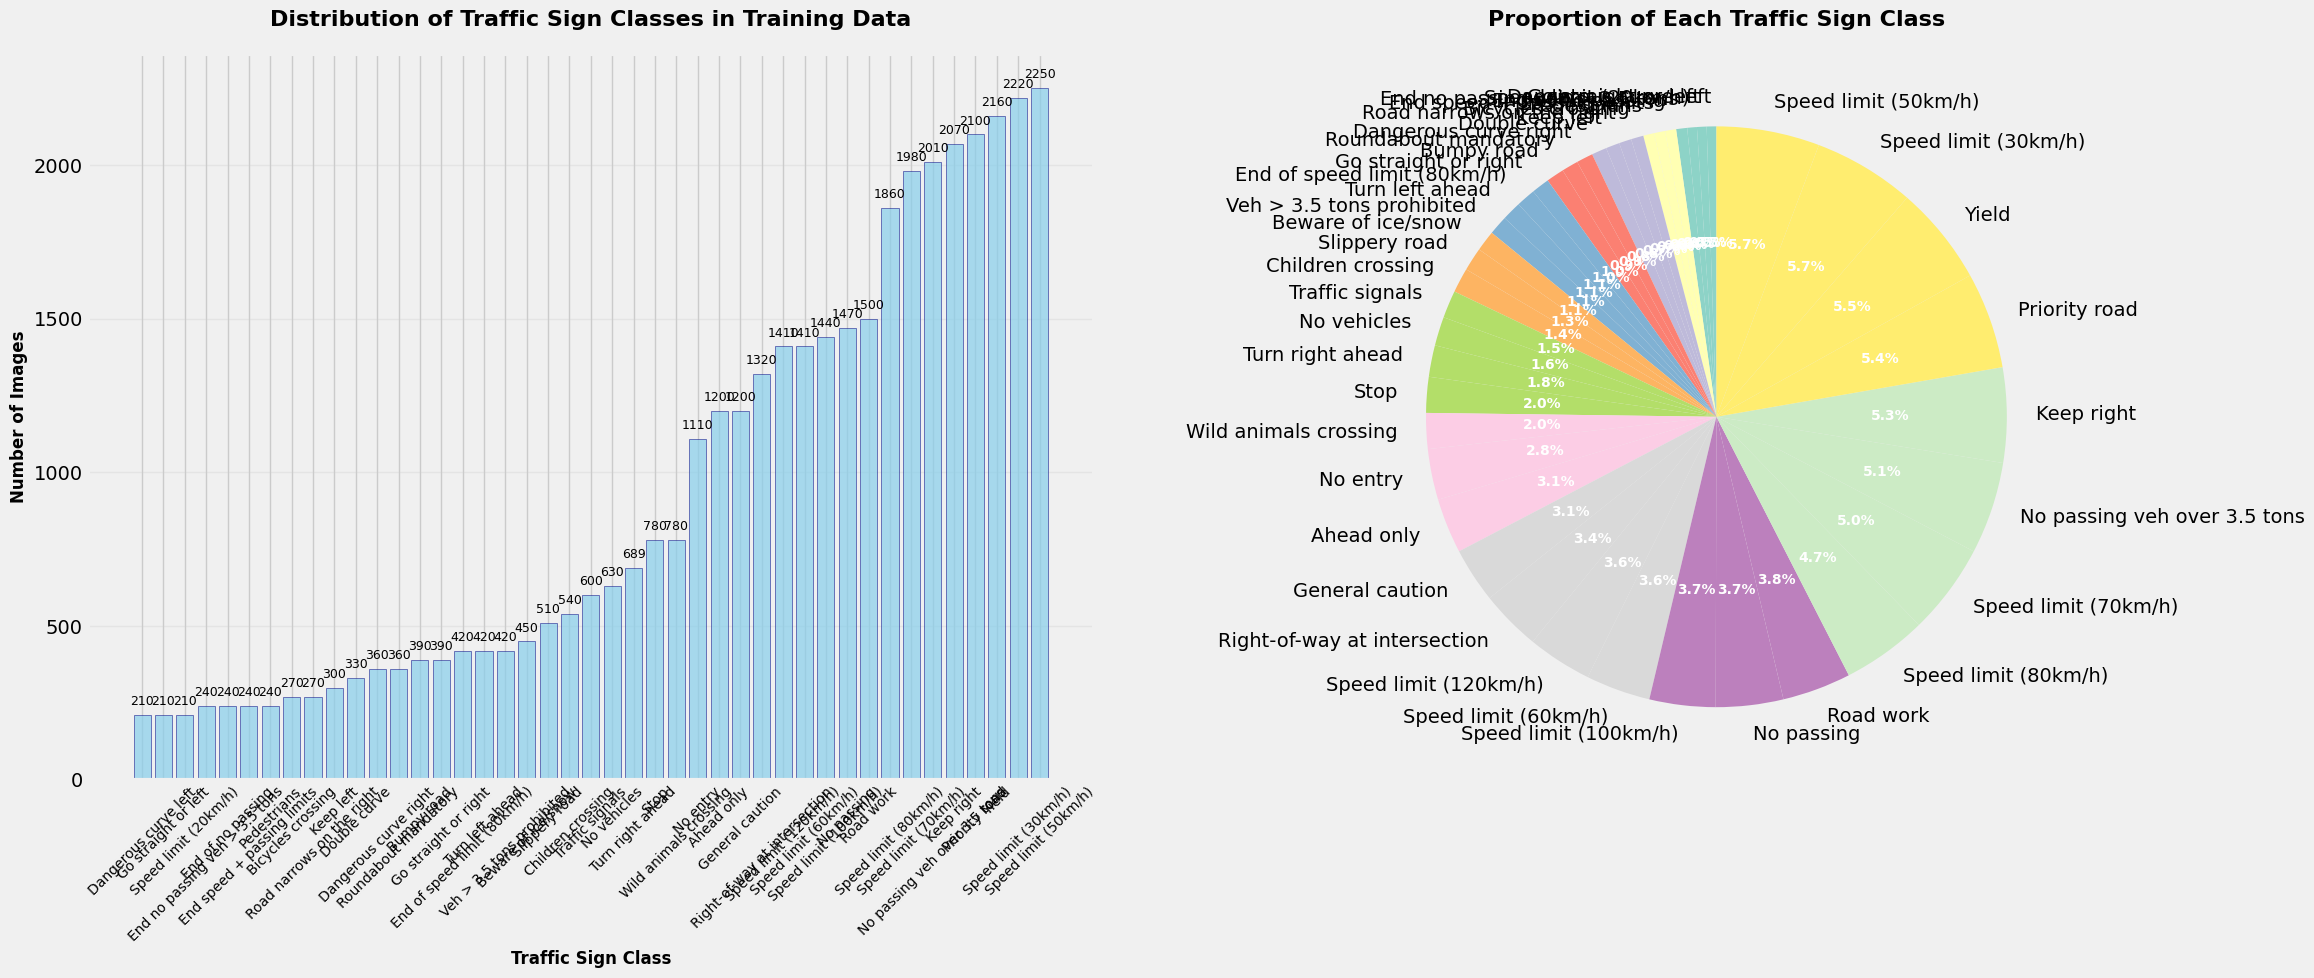

=== DATA DISTRIBUTION OBSERVATIONS ===
Total training images: 39209
Number of classes: 43
Average images per class: 911.8
Class with most images: Speed limit (50km/h) (2250 images)
Class with least images: Dangerous curve left (210 images)
Standard deviation: 687.7
Class imbalance ratio (max/min): 10.7:1
⚠️  Significant class imbalance detected - consider data augmentation for minority classes


In [ ]:
train_folders = os.listdir(train_path)

train_number = []
class_num = []


for folder in train_folders:
    train_files = Path(train_path) / folder
    train_number.append(len(list(train_files.iterdir())))
    class_num.append(classes[int(folder)])


zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]


    


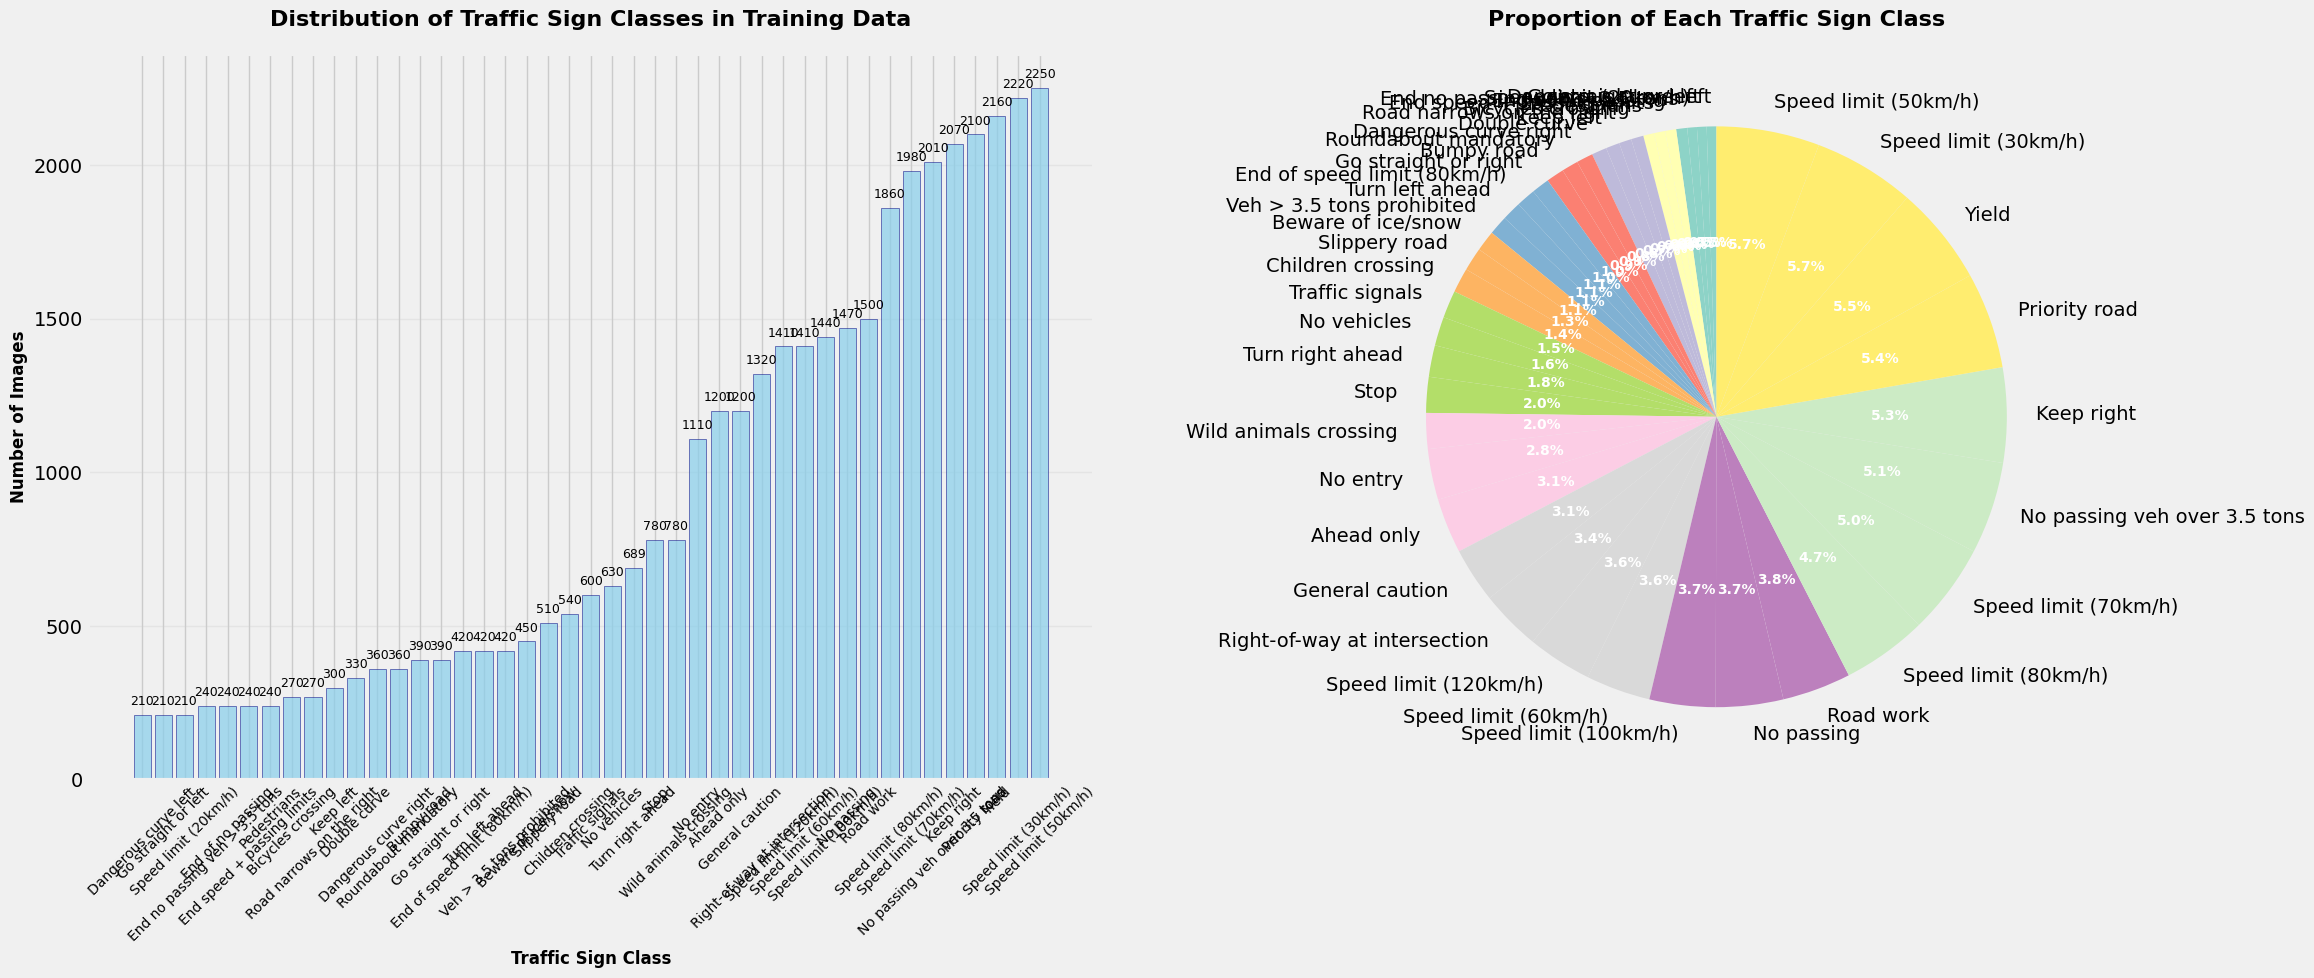

=== DATA DISTRIBUTION OBSERVATIONS ===
Total training images: 39209
Number of classes: 43
Average images per class: 911.8
Class with most images: Speed limit (50km/h) (2250 images)
Class with least images: Dangerous curve left (210 images)
Standard deviation: 687.7
Class imbalance ratio (max/min): 10.7:1
⚠️  Significant class imbalance detected - consider data augmentation for minority classes


In [34]:
# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

# Bar chart
bars = ax1.bar(class_num, train_number, color='skyblue', edgecolor='navy', alpha=0.7)
ax1.set_title('Distribution of Traffic Sign Classes in Training Data', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Traffic Sign Class', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Images', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + max(train_number)*0.01,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Pie chart
colors = plt.cm.Set3(np.linspace(0, 1, len(class_num)))
wedges, texts, autotexts = ax2.pie(train_number, labels=class_num, autopct='%1.1f%%', 
                                   colors=colors, startangle=90)
ax2.set_title('Proportion of Each Traffic Sign Class', fontsize=16, fontweight='bold', pad=20)

# Style the pie chart text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

plt.tight_layout()
plt.show()

# Print observations
print("=== DATA DISTRIBUTION OBSERVATIONS ===")
print(f"Total training images: {sum(train_number)}")
print(f"Number of classes: {len(class_num)}")
print(f"Average images per class: {sum(train_number)/len(class_num):.1f}")
print(f"Class with most images: {class_num[train_number.index(max(train_number))]} ({max(train_number)} images)")
print(f"Class with least images: {class_num[train_number.index(min(train_number))]} ({min(train_number)} images)")
print(f"Standard deviation: {np.std(train_number):.1f}")

# Check for class imbalance
imbalance_ratio = max(train_number) / min(train_number)
print(f"Class imbalance ratio (max/min): {imbalance_ratio:.1f}:1")

if imbalance_ratio > 5:
    print("⚠️  Significant class imbalance detected - consider data augmentation for minority classes")
elif imbalance_ratio > 2:
    print("⚠️  Moderate class imbalance - monitor training performance")
else:
    print("✅  Relatively balanced dataset")